## **Libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

## **Problem 3.**

El famoso polímata italiano Leonardo da Vinci (1452-1519) propuso en sus estudios anatómicos que existe una proporción particular en el cuerpo humano: la distanciaentre los brazos extendidos horizontalmente (formando una “T” con el cuerpo) es aproximadamente igual a la estatura de la persona. Para verificar esta hipótesis, utilizaremos datos de 1500 estudiantes del Census at school que usaron en el primer proyecto.

### *Data reading*

In [2]:
df_3 = pd.read_csv('../data/merged_data.csv')
df_3

,Height_cm,Armspan_cm
0,178,186
1,158,152
2,174,174
3,176,183
4,160,66
...,...,...
1495,167,171
1496,193,197
1497,66,54
1498,152,61


### *a. Realice un diagrama de dispersión (scatter plot) para visualizar la relación entre la distancia entre brazos extendidos (eje x) y la estatura (eje y). Utilice la misma escala en ambos ejes. ¿Qué tipo de relación observa entre estas variables?*

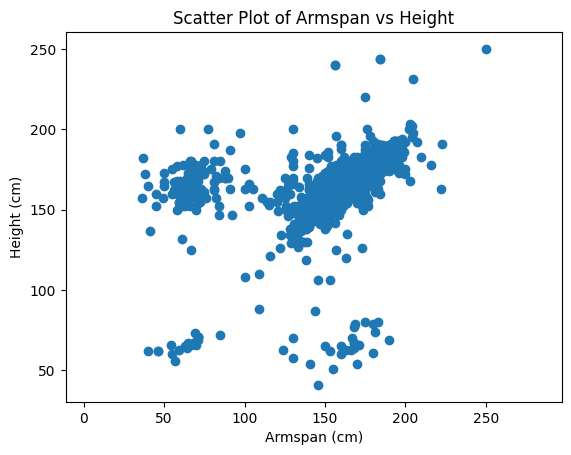

In [3]:
plt.scatter(df_3['Armspan_cm'], df_3['Height_cm'])
plt.xlabel('Armspan (cm)')
plt.ylabel('Height (cm)')
plt.title('Scatter Plot of Armspan vs Height')
plt.axis('equal')  
plt.show()

El diagrama de dispersión tiene una buena correlación lineal positiva, que podríamos enfocar a un modelo de regresión lineal. Sin embargo, puedo observar una correlación negativa "cuadratica" como le llamo yo, es decir, que se pueda enfocar a un modelo de regresión cuadratico, teniendo como negativo el parametro a (es decir, la función cuadratica sea negativa o apunte hacia abajo). Existen algunos datos dispersos, pero una gran mayoría se concentran en los lugares objetivos (planteando que la teoría de da Vinci es cierta, sobre que la longitud de brazos extendidos en "T" sea igual a la altura)

### *b. Según la hipótesis de da Vinci, ¿qué valor debería tener la pendiente de la recta de regresión? Justifique su respuesta.*

El valor que tendría que mx, tomando en cuenta la formula de la pendiente de la forma y = mx+b, debe ser mx>0, o lo que es lo mismo, ser de valores positivos o tener pendiente positiva. Esto, pues vemos que la recta que más puede minimizar el error (tomando como referencia las predicciones), es una recta positiva, ya que hay una mayoría de datos si trazamos esa recta positiva, y la cercanía de los otros datos no se ve tan comprometida, por ende no se podría perder tanta precisión con una recta positiva.

### *c. Determine la ecuación de la recta de regresión para predecir la estatura a partir de la distancia entre brazos. Compare la pendiente obtenida con su respuesta del inciso anterior. ¿Qué puede concluir?*

Coeficiente (pendiente): 0.2771864348331272
Término independiente: 120.46053890408808


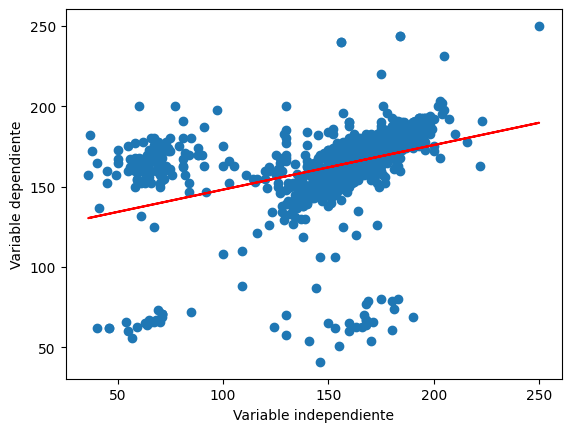

In [5]:
X = df_3['Armspan_cm'].values.reshape(-1, 1)
y = df_3['Height_cm']

modelo = LinearRegression()

modelo.fit(X, y)

predicciones = modelo.predict(X)

# Imprimir coeficiente (pendiente) y término independiente (intercepto)
print("Coeficiente (pendiente):", modelo.coef_[0])
print("Término independiente:", modelo.intercept_)

plt.scatter(df_3['Armspan_cm'], y)
plt.plot(df_3['Armspan_cm'], predicciones, color='red')
plt.xlabel("Variable independiente")
plt.ylabel("Variable dependiente")
plt.show()

El modelo de regresión líneal más apróximado es a través de una función con pendiente positiva, tal como lo dije anteriormente. Esto significa, para concluir, que sí hay una buena mayoría de datos apuntando a una pendiente positiva.

### *d. Para una persona con una distancia entre brazos de 65 pulgadas (165,1 céntimetros): ¿Cuál sería su estatura predicha? ¿Cuál es el error estándar de esta predicción? Construya un intervalo de predicción del 95% para esta estatura.*

In [6]:
import numpy as np
from scipy import stats

# Given armspan in cm
armspan = 165.1

# Predict the height
predicted_height = modelo.predict(np.array([[armspan]]))[0]

n = len(X)
mean_x = np.mean(X)
se = np.sqrt(np.sum((y - predicciones) ** 2) / (n - 2)) / np.sqrt(np.sum((X - mean_x) ** 2))

t_value = stats.t.ppf(0.975, df=n-2)
margin_of_error = t_value * se
lower_bound = predicted_height - margin_of_error
upper_bound = predicted_height + margin_of_error

print(f"Predicted height: {predicted_height:.2f} cm")
print(f"Standard error: {se:.2f}")
print(f"95% prediction interval: [{lower_bound:.2f}, {upper_bound:.2f}] cm")

Predicted height: 166.22 cm
Standard error: 0.02
95% prediction interval: [166.19, 166.26] cm


Si bien el modelo predice de una persona que tiene una distancia entre brazos de 65 pulgadas (165,1 céntimetros) es que tiene de largo una altura de 65,4 pulgadas (166,2 céntrimetros).
Como conclusión, se puede mencionar con un 95% de predicción, que para una persona que tiene una distancia entre brazos de 65 pulgadas tiene una altura en un intervalo de 65,4 pulgadas (166,19 céntrimetros) y 65,5 pulgadas (166,26 céntrimetros).